<a href="https://colab.research.google.com/github/sachinthadilshann/pytorch_course_by_DanielBourke/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision

## 0. Computer vision libraries in PyTorch

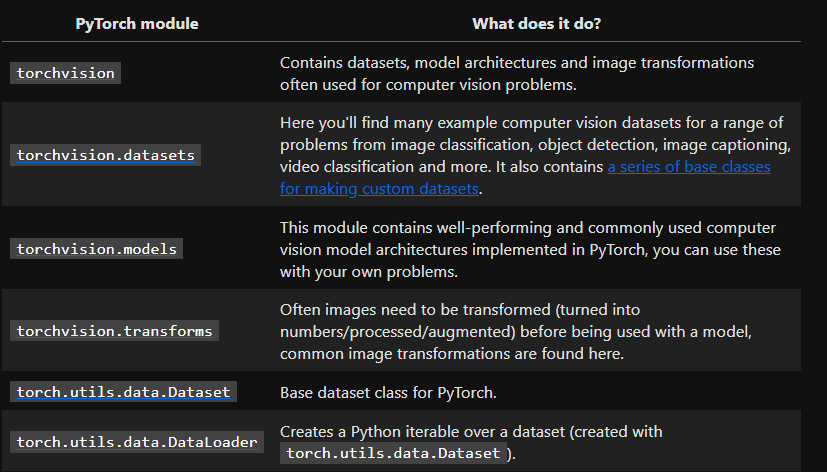

In [58]:
import torch
from torch import nn

import torchvision

from torchvision import datasets,transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.9.0+cpu
0.24.0+cpu


## 1. Getting Dataset

In [59]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [60]:
len(train_data),len(test_data)

(60000, 10000)

In [61]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [62]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [63]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [64]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [65]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

###1.1 Input and output shapes of a computer vision model

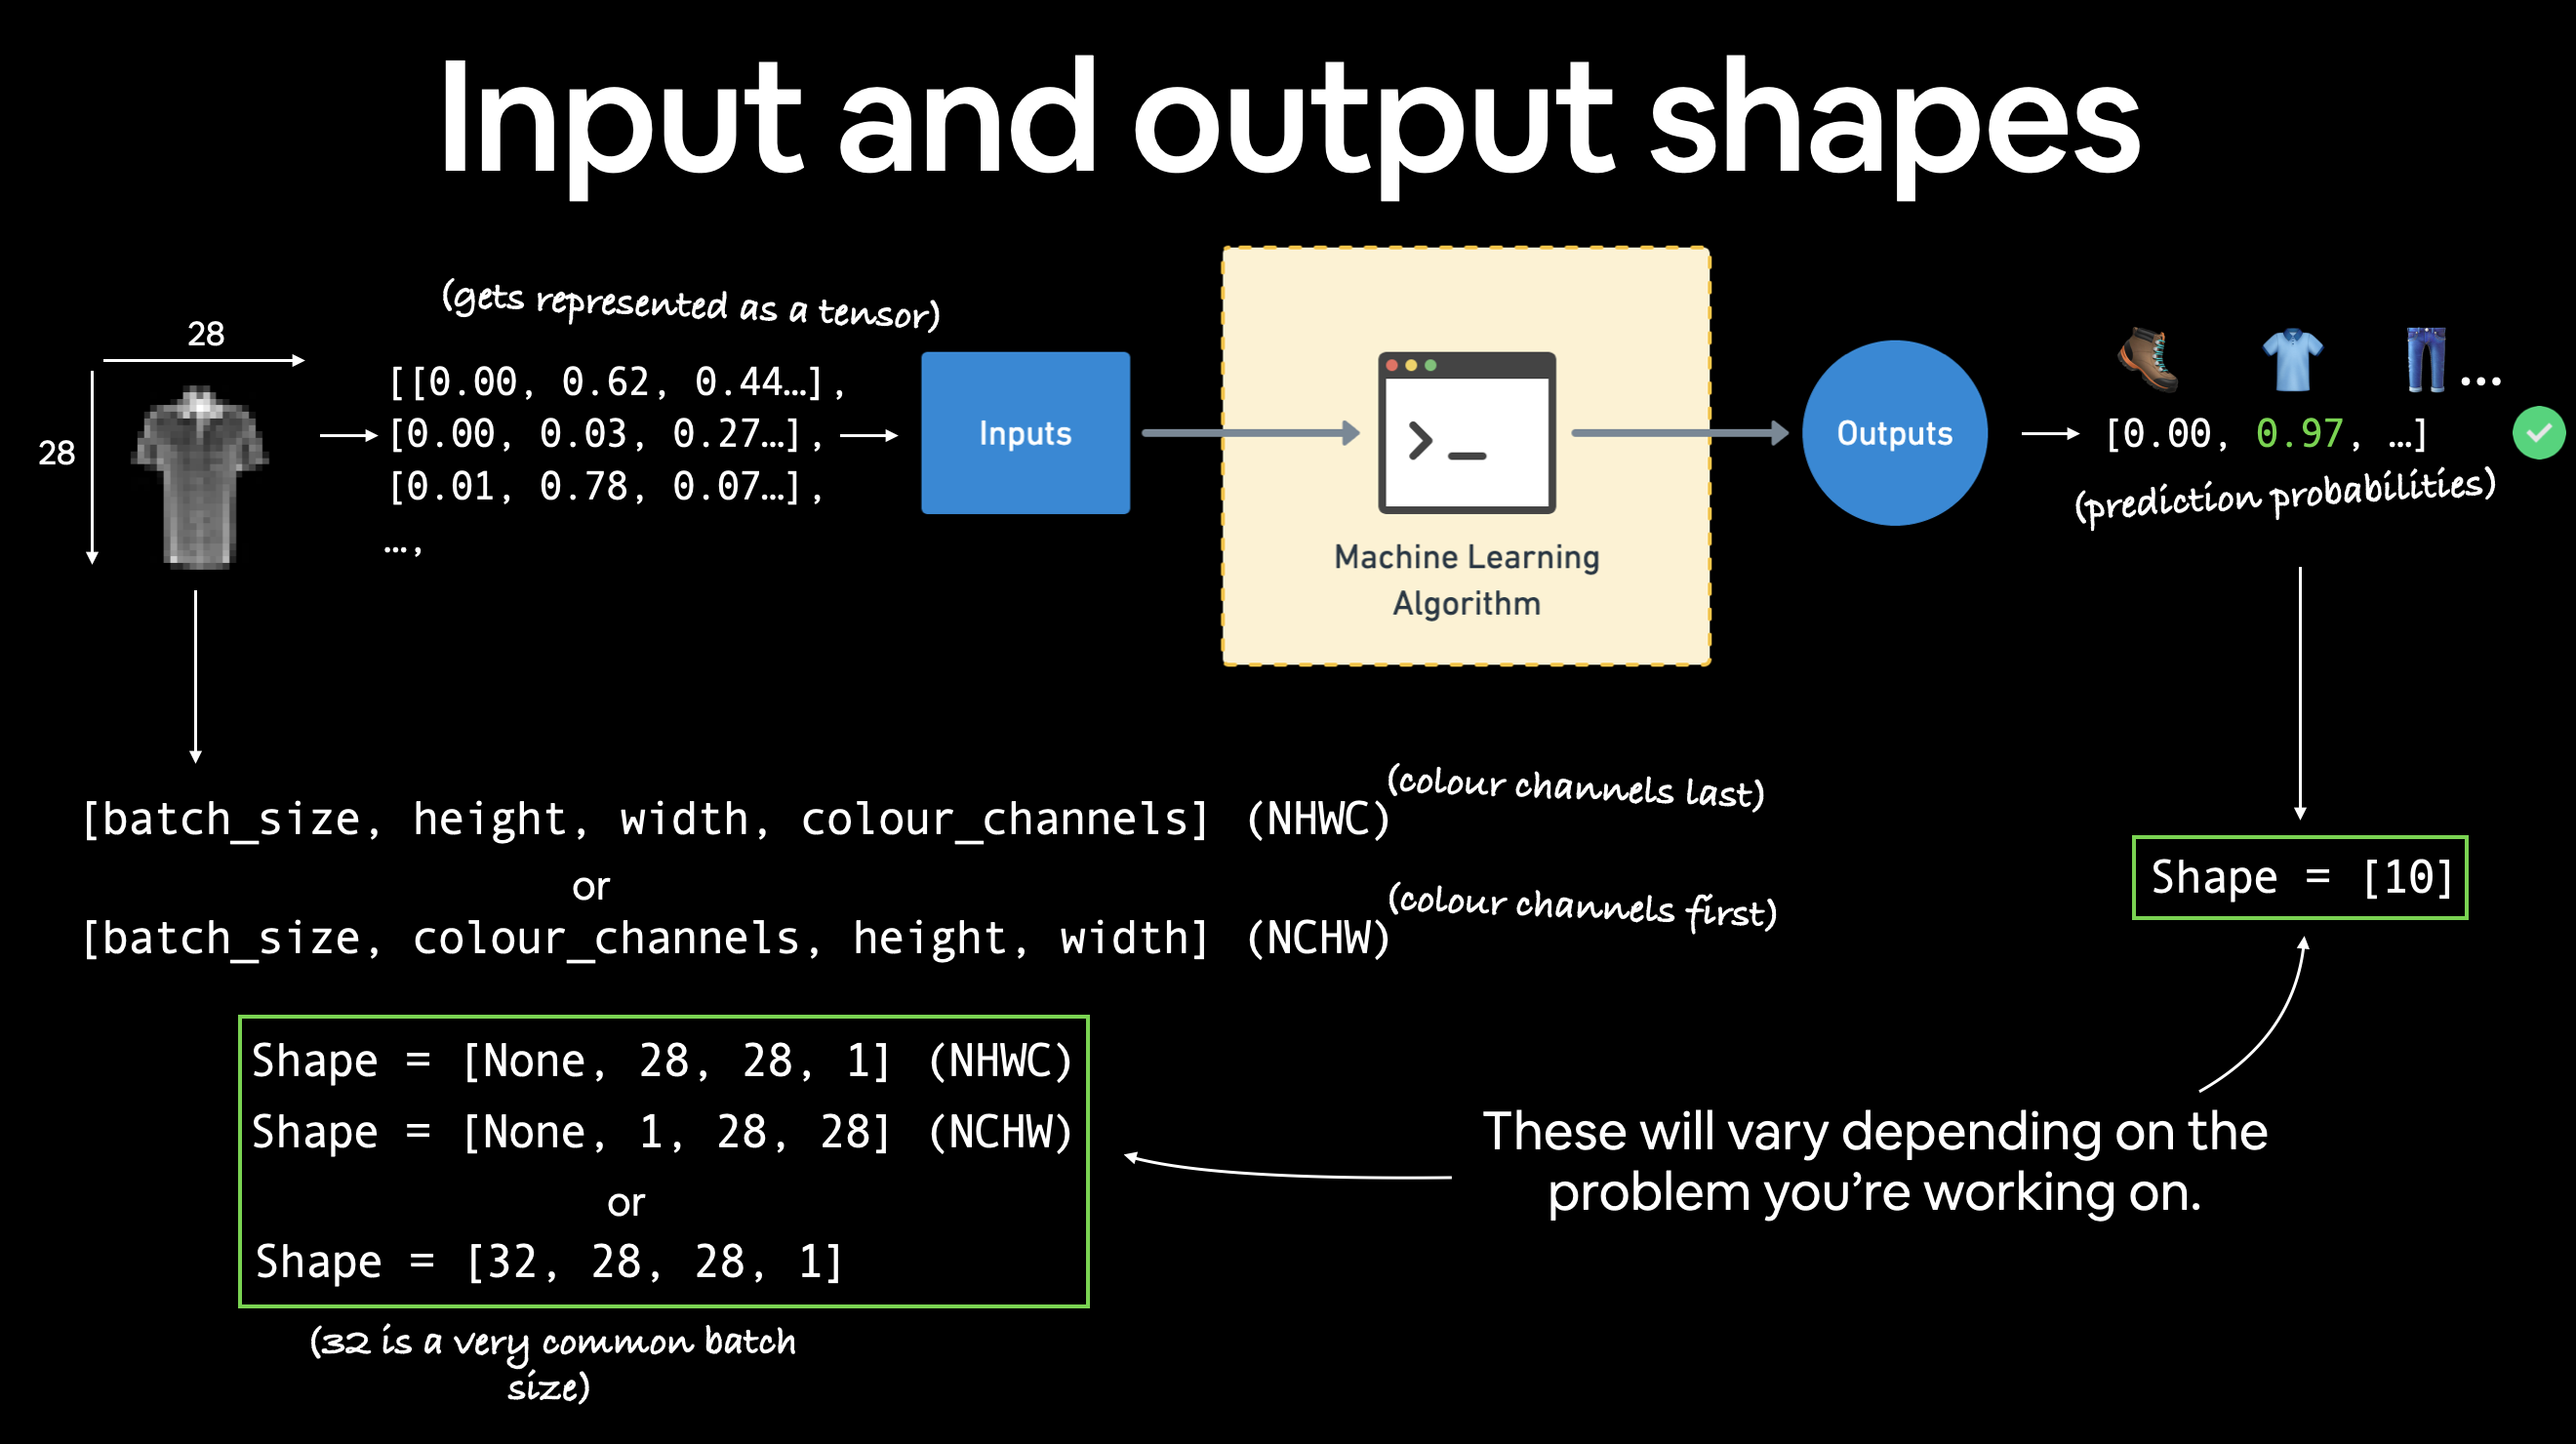

In [66]:
image.shape

torch.Size([1, 28, 28])

In [67]:
print(f"Image shape: {image.shape} -> [color channels,height,width]")
print(f"Image label : {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color channels,height,width]
Image label : Ankle boot


###1.2 Visualizing data

image shape : torch.Size([1, 28, 28])


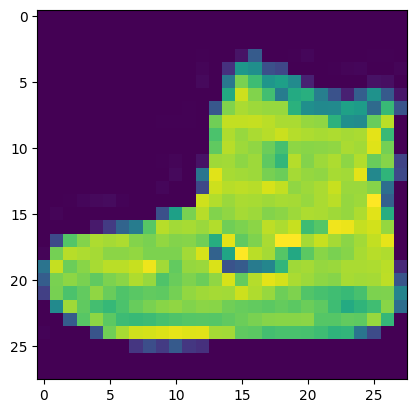

In [68]:
image, label = train_data[0]
print(f"image shape : {image.shape}")
plt.imshow(image.permute(1, 2, 0))
plt.show()

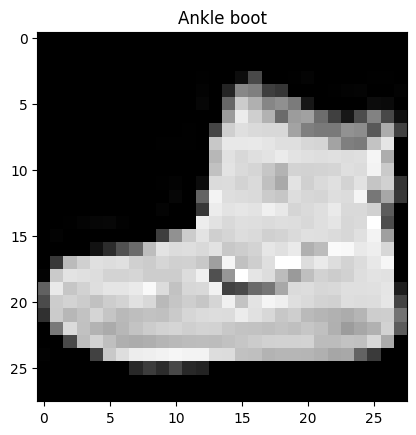

In [69]:

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

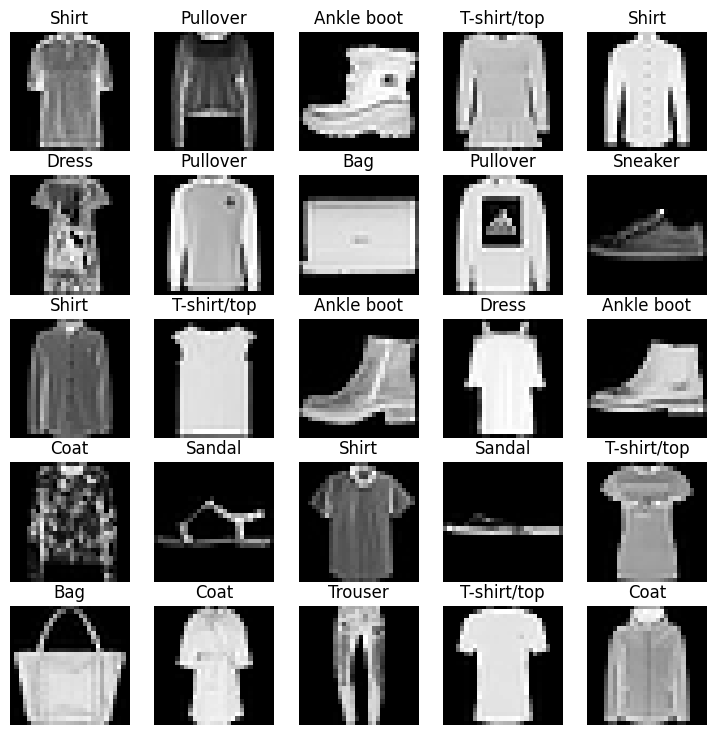

In [70]:

fig = plt.figure(figsize=(9, 9))
rows, cols = 5, 5
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

##2. Prepare DataLoader

In [71]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [72]:
 from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,
                              batch_size = 32,
                              shuffle = True)

test_dataloader = DataLoader(test_data,
                              batch_size = 32,
                              shuffle = True)

train_dataloader ,train_dataloader



(<torch.utils.data.dataloader.DataLoader at 0x7edfc8f2e390>,
 <torch.utils.data.dataloader.DataLoader at 0x7edfc8f2e390>)

In [73]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


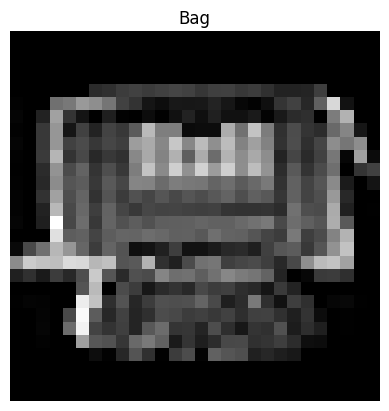

In [74]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

##3. Model 0: Build a baseline model

In [75]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"shape befoe flatten : {x.shape}")
print(f"shape after flatten : {output.shape}")



shape befoe flatten : torch.Size([1, 28, 28])
shape after flatten : torch.Size([1, 784])


In [76]:
output.shape

torch.Size([1, 784])

In [77]:
from torch import nn

class FashionMNISTV0(nn.Module):
  def __init__(self,
              input_shape:int,
              output_shape:int,
              hidden_units:int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)



In [78]:
model_0 = FashionMNISTV0(
    input_shape=784,  #28*28
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')

model_0



FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [79]:
dummy_x  = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.0047,  0.0683, -0.5717, -0.0758,  0.4360, -0.1014, -0.0568,  0.0886,
          0.2552,  0.0316]], grad_fn=<AddmmBackward0>)

In [80]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0178, -0.0142, -0.0189,  ...,  0.0337,  0.0121, -0.0189],
                      [ 0.0171, -0.0298,  0.0274,  ...,  0.0141, -0.0321, -0.0296],
                      [ 0.0057,  0.0106,  0.0010,  ...,  0.0342, -0.0180, -0.0269],
                      ...,
                      [ 0.0229,  0.0276,  0.0338,  ..., -0.0207, -0.0081,  0.0024],
                      [ 0.0061,  0.0171,  0.0018,  ...,  0.0260,  0.0333,  0.0230],
                      [-0.0012, -0.0317,  0.0117,  ...,  0.0245, -0.0243,  0.0058]])),
             ('layer_stack.1.bias',
              tensor([ 0.0267,  0.0208, -0.0024,  0.0237,  0.0181,  0.0114,  0.0097,  0.0229,
                       0.0089, -0.0012])),
             ('layer_stack.2.weight',
              tensor([[ 5.6135e-02, -1.9711e-01, -1.2283e-01,  1.7433e-01,  1.1489e-01,
                       -2.0933e-01, -1.7217e-01, -1.3729e-01, -2.8951e-01, -1.1823e-01],
                      [ 3.1437e-01,  1.4

### 3.1 Setup loss, optimizer and evaluation metrics

In [81]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [82]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


###
3.2 Creating a function to time our experiments

In [83]:
from timeit import default_timer as timer


def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [84]:
from IPython.utils.path import ensure_dir_exists
start_time = timer()
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


7.217999973363476e-05

### 3.3 Creating a training loop and training a model on batches of data

In [85]:
from tqdm.auto import tqdm

print_train_time_on_cpu = timer()

model_0 = torch.compile(model_0)
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epochs}\n----")

  train_loss = 0

  for batch ,(X,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)
    loss = loss_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  #testing

  test_loss,test_acc = 0,0
  model_0.eval()

  with torch.inference_mode():
    for X_test,y_test in test_dataloader:

      #forwardpass
      test_pred = model_0(X_test)

      #calculate loss
      test_loss += loss_fn(test_pred,y_test)

      #calculate accuracy

      test_acc += loss_fn(test_pred,y_test)

      test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 3
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.00000 | Test loss: 0.54128 | Test acc: 81.44180
Epochs: 3
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.00000 | Test loss: 0.49589 | Test acc: 82.87407
Epochs: 3
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.00000 | Test loss: 0.50989 | Test acc: 81.74992


##4. Make Predictions and get Model 0 Results

In [86]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:

            y_pred = model(X)


            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)


        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'OptimizedModule',
 'model_loss': 0.5095041990280151,
 'model_acc': 81.27995207667732}

##5. Setup device dagnostic-code

In [87]:
torch.cuda.is_available()

False

In [88]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [89]:
import torch

device  = "cuda"  if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1 : Building a better non-linear model

In [90]:
class FashionMNISTV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)

In [91]:
model_1 = FashionMNISTV1(input_shape=784,
                         hidden_units=10,
                         output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cpu')

###6.1 Setup loss,Optimizer and Evaluation Metrics

In [92]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

###6.2 Functionizing training and evaluation loss

In [93]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss,train_acc = 0,0

  model.to(device)


  for batch,(X,y) in enumerate(data_loader):
    X,y = X.to(device),y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}")



In [94]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:

            X, y = X.to(device), y.to(device)


            test_pred = model(X)


            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [95]:
epochs = 3
model_1 = torch.compile(model_1)
for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epochs}\n----")
  train_step(model_1,
             data_loader=train_dataloader,
             loss_fn = loss_fn ,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn)


  test_step(data_loader=test_dataloader,
            model=model_1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)



  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 3
----
Train loss: 0.93152 | Train acc: 71.08500
Test loss: 0.71551 | Test accuracy: 79.06%

Epochs: 3
----
Train loss: 0.52639 | Train acc: 81.83667
Test loss: 0.49169 | Test accuracy: 82.71%

Epochs: 3
----
Train loss: 0.45750 | Train acc: 83.67000
Test loss: 0.45456 | Test accuracy: 84.03%



In [96]:
model_0_results

{'model_name': 'OptimizedModule',
 'model_loss': 0.5095041990280151,
 'model_acc': 81.27995207667732}

In [97]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:

            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))


        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'OptimizedModule',
 'model_loss': 0.4545154869556427,
 'model_acc': 84.03554313099042}

## 7. Model 2: Building a Convolutional Neural Network (CNN)

In [98]:
class FashionMNISTV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*0,
                  out_features = output_shape))

  def forward(self,x) :
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    return x

In [99]:
len(class_names)

10

In [100]:
model_2 = FashionMNISTV2(input_shape=3,
                         hidden_units=10,
                         output_shape=len(class_names)).to(device)

/usr/local/lib/python3.12/dist-packages/torch/nn/init.py:566: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


### 7.1 Stepping through nn.Conv2d()

In [101]:
from IPython.testing import test
torch.manual_seed(42)

images = torch.rand(size=(32,3,64,64))

test_image = images[0]

print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263,

In [102]:
test_image.shape

torch.Size([3, 64, 64])

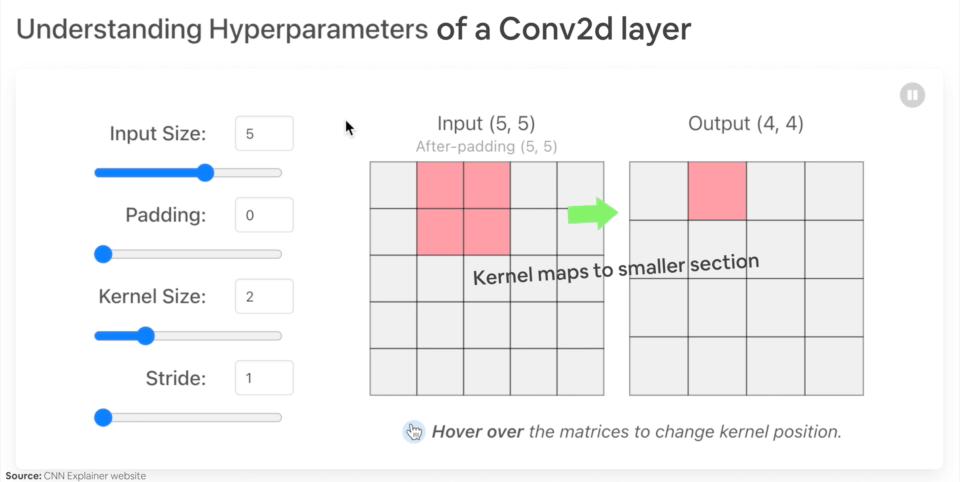

In [103]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size = (3,3),
                       padding=0,
                       stride=1)

conv_layer

Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))

In [104]:
conv_output = conv_layer(test_image)

conv_output.shape

torch.Size([10, 62, 62])

###7.2 Stepping through nn.MaxPool2d()

In [105]:
test_image.shape

torch.Size([3, 64, 64])

In [106]:
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])


In [107]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_through_conv = conv_layer(test_image)

test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conc_layer():{test_image_through_conv}")

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")


Shape after going through conc_layer():tensor([[[-0.4432, -0.4266, -0.7313,  ..., -0.3842, -0.4029, -0.2580],
         [-0.5172, -0.6280, -0.5067,  ..., -0.5455, -0.2697, -0.3392],
         [-0.6129, -0.4303, -0.3513,  ..., -0.2895, -0.3527, -0.5661],
         ...,
         [-0.4673, -0.3827, -0.3777,  ..., -0.5011, -0.5698, -0.2990],
         [-0.3849, -0.4654, -0.5875,  ..., -0.7656, -0.4689, -0.4657],
         [-0.5404, -0.1720, -0.1813,  ..., -0.7557, -0.5228, -0.5067]],

        [[-0.5316, -0.1805, -0.3830,  ..., -0.3040,  0.1747, -0.1271],
         [-0.0159, -0.2488, -0.2986,  ..., -0.0356, -0.2788, -0.3086],
         [-0.2891, -0.4163, -0.3072,  ..., -0.2823, -0.1784, -0.3035],
         ...,
         [-0.3779, -0.1186, -0.1976,  ..., -0.0708, -0.1470, -0.2759],
         [ 0.0127,  0.0269, -0.0898,  ..., -0.1350, -0.1111, -0.4801],
         [-0.3296,  0.0213,  0.0134,  ..., -0.3110, -0.2932, -0.3754]],

        [[ 0.4062,  0.3490,  0.5550,  ...,  0.5446,  0.4686,  0.3256],
      

In [108]:
random_tensor = torch.rand(1,1,5,5)
print(f"Random tensor: {random_tensor}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"Tensor after going through max pooling layer: {max_pool_tensor} ")

Random tensor: tensor([[[[0.8752, 0.8225, 0.0145, 0.2480, 0.0049],
          [0.7702, 0.7688, 0.7378, 0.3597, 0.8212],
          [0.7397, 0.3675, 0.3372, 0.5302, 0.1371],
          [0.1484, 0.3490, 0.6189, 0.1691, 0.6719],
          [0.7319, 0.0065, 0.5490, 0.3701, 0.5229]]]])
Tensor after going through max pooling layer: tensor([[[[0.8752, 0.7378],
          [0.7397, 0.6189]]]]) 


In [109]:
!apt-get install jq -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
jq is already the newest version (1.6-2.1ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [110]:
!jq 'del(.metadata.widgets)' 03_pytorch_computer_vision.ipynb > 03_pytorch_computer_vision.ipynb
